In [483]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


In [484]:
inputs = np.array([
    [0,0],
    [0,1],
    [1,0],
    [1,1]
])

# Compuerta lógica AND, OR & XOR
labels_and = np.array([0,0,0,1])
labels_or = np.array([0,1,1,1])
labels_xor = np.array([0,1,1,0])

In [485]:
# Visualización de los datos
def comp_log(inputs,labels):
    plt.scatter(inputs[:,0],inputs[:,1], c=labels, cmap="cool", marker="o", label="Datos de entrada", s=125)
    plt.xlabel("x1")
    plt.ylabel("x2")
    plt.grid(True)


In [486]:
class Perceptron():
    def __init__(self,learning_rate,epochs):
        self.learning_rate = learning_rate # Tasa de aprendizaje
        self.epochs = epochs
        self.weights = None
        self.bias = None
        
    
    def activation(self,z):
        return np.where(z > 0, 1, 0)

    def predict(self,input, weights, bias):
        z = np.dot(input, self.weights) + self.bias
        return self.activation(z)

    def accuracy_score(self,y_true, y_pred):
        correct_predictions = sum(y_t == y_p for y_t, y_p in zip(y_true, y_pred))
        total_predictions = len(y_true)
        return correct_predictions / total_predictions
 
    def train(self,inputs,labels):
        # Inicializar aleatoriamente los pesos y bias 
        self.weights = np.random.rand(2)
        self.bias = np.random.rand()
    
        for epoch in range(self.epochs):
            print(f"Epoch {epoch}")
            total_error = 0
            for input, label in zip(inputs,labels):
                print(f"Input: {input}, Label: {label}", end=" ")
                z = np.dot(input, self.weights) + self.bias
                y_pred = self.activation(z)
            
                # Error
                error = label - y_pred
                total_error += abs(error)
                print(f"Error: {error}")
            
                # Actualización de weights y bias
                delta_w = self.learning_rate * error * input
                self.weights = self.weights + delta_w
            
                delta_bias = self.learning_rate * error 
                self.bias = self.bias + delta_bias
        
            average_error = total_error / len(inputs)
            print(f"Average error: {average_error}")
            if average_error == 0: 
                break
    
        return self.weights, self.bias 
            

In [487]:
# Instancia
Perceptron = Perceptron(0.9,20)

In [488]:
w_and, b_and = Perceptron.train(inputs, labels_and)
print(f"Pesos ajustados: {w_and}")
print(f"Bias ajustado: {b_and}")

Epoch 0
Input: [0 0], Label: 0 Error: -1
Input: [0 1], Label: 0 Error: 0
Input: [1 0], Label: 0 Error: 0
Input: [1 1], Label: 1 Error: 1
Average error: 0.5
Epoch 1
Input: [0 0], Label: 0 Error: -1
Input: [0 1], Label: 0 Error: -1
Input: [1 0], Label: 0 Error: 0
Input: [1 1], Label: 1 Error: 1
Average error: 0.75
Epoch 2
Input: [0 0], Label: 0 Error: 0
Input: [0 1], Label: 0 Error: -1
Input: [1 0], Label: 0 Error: -1
Input: [1 1], Label: 1 Error: 1
Average error: 0.75
Epoch 3
Input: [0 0], Label: 0 Error: 0
Input: [0 1], Label: 0 Error: 0
Input: [1 0], Label: 0 Error: -1
Input: [1 1], Label: 1 Error: 1
Average error: 0.5
Epoch 4
Input: [0 0], Label: 0 Error: 0
Input: [0 1], Label: 0 Error: -1
Input: [1 0], Label: 0 Error: 0
Input: [1 1], Label: 1 Error: 0
Average error: 0.25
Epoch 5
Input: [0 0], Label: 0 Error: 0
Input: [0 1], Label: 0 Error: 0
Input: [1 0], Label: 0 Error: 0
Input: [1 1], Label: 1 Error: 0
Average error: 0.0
Pesos ajustados: [2.10843201 1.00772983]
Bias ajustado: -2.2

In [489]:
Perceptron.predict([1,0], w_and, b_and)

array(0)

In [490]:
print(w_and[1])

1.0077298272811288


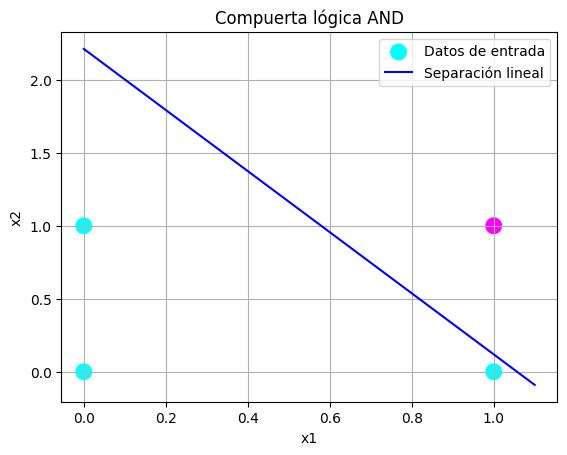

In [491]:
# Visualización con separación lineal
comp_log(inputs,labels_and)
plt.title("Compuerta lógica AND")
x_values = np.linspace(0,1.1,100)
y_values = (-w_and[0] / w_and[1]) * x_values - b_and / w_and[1]

plt.plot(x_values, y_values, '-b', label='Separación lineal')
plt.legend()
plt.show()



In [492]:
Perceptron.learning_rate = 0.9
Perceptron.epochs = 8

In [493]:
w_or, b_or = Perceptron.train(inputs, labels_or)
print(f"Pesos ajustados: {w_or}")
print(f"Bias ajustado: {b_or}")

Epoch 0
Input: [0 0], Label: 0 Error: -1
Input: [0 1], Label: 1 Error: 0
Input: [1 0], Label: 1 Error: 0
Input: [1 1], Label: 1 Error: 0
Average error: 0.25
Epoch 1
Input: [0 0], Label: 0 Error: 0
Input: [0 1], Label: 1 Error: 0
Input: [1 0], Label: 1 Error: 0
Input: [1 1], Label: 1 Error: 0
Average error: 0.0
Pesos ajustados: [0.96311981 0.75174136]
Bias ajustado: -0.5721274462896632


In [494]:
Perceptron.predict([1,0], w_or, b_or)

array(1)

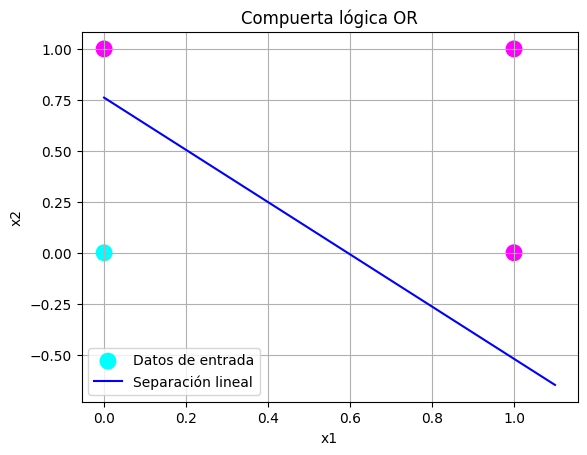

In [495]:
# Compuerta lógica OR

comp_log(inputs,labels_or)
plt.title("Compuerta lógica OR")
x_values = np.linspace(0,1.1,100)
y_values = (-w_or[0] / w_or[1]) * x_values - b_or / w_or[1] 
plt.plot(x_values, y_values, '-b', label='Separación lineal')
plt.legend()
plt.show()


Siempre habrá error

In [496]:
w_xor, b_xor = Perceptron.train(inputs, labels_xor)
print(f"Pesos ajustados: {w_xor}")
print(f"Bias ajustado: {b_xor}")

Epoch 0
Input: [0 0], Label: 0 Error: -1
Input: [0 1], Label: 1 Error: 1
Input: [1 0], Label: 1 Error: 0
Input: [1 1], Label: 0 Error: -1
Average error: 0.75
Epoch 1
Input: [0 0], Label: 0 Error: 0
Input: [0 1], Label: 1 Error: 1
Input: [1 0], Label: 1 Error: 0
Input: [1 1], Label: 0 Error: -1
Average error: 0.5
Epoch 2
Input: [0 0], Label: 0 Error: 0
Input: [0 1], Label: 1 Error: 1
Input: [1 0], Label: 1 Error: 1
Input: [1 1], Label: 0 Error: -1
Average error: 0.75
Epoch 3
Input: [0 0], Label: 0 Error: -1
Input: [0 1], Label: 1 Error: 1
Input: [1 0], Label: 1 Error: 1
Input: [1 1], Label: 0 Error: -1
Average error: 1.0
Epoch 4
Input: [0 0], Label: 0 Error: -1
Input: [0 1], Label: 1 Error: 1
Input: [1 0], Label: 1 Error: 1
Input: [1 1], Label: 0 Error: -1
Average error: 1.0
Epoch 5
Input: [0 0], Label: 0 Error: -1
Input: [0 1], Label: 1 Error: 1
Input: [1 0], Label: 1 Error: 1
Input: [1 1], Label: 0 Error: -1
Average error: 1.0
Epoch 6
Input: [0 0], Label: 0 Error: -1
Input: [0 1], Lab

In [497]:
Perceptron.predict([1,0], w_xor, b_xor) # Respuesta no esperada

array(0)

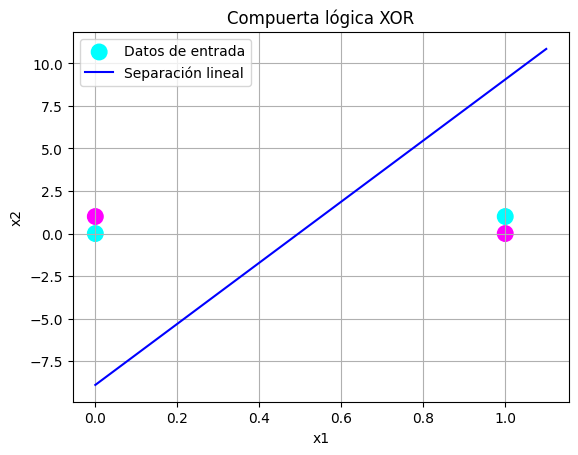

In [498]:
# Compuerta lógica OR (imposible de clasificar para el perceptron)

comp_log(inputs,labels_xor)
plt.title("Compuerta lógica XOR")
x_values = np.linspace(0,1.1,100)
y_values = (-w_xor[0] / w_xor[1]) * x_values - b_xor / w_xor[1] 
plt.plot(x_values, y_values, '-b', label='Separación lineal')
plt.legend()
plt.show()

In [499]:
iris = load_iris()
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [500]:
data_df = pd.DataFrame(iris.data,columns=iris.feature_names)
data_df['target'] = iris.target

data_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


Filtraremos por ciertas columnas y mostraremos solo los que sean setosa y versicolor **(target 0 y 1)**

In [501]:
data_df = data_df[['sepal length (cm)','petal length (cm)','target']]
data_df = data_df[data_df['target'].isin([0,1])]
data_df

,sepal length (cm),petal length (cm),target
0,5.1,1.4,0
1,4.9,1.4,0
2,4.7,1.3,0
3,4.6,1.5,0
4,5.0,1.4,0
...,...,...,...
95,5.7,4.2,1
96,5.7,4.2,1
97,6.2,4.3,1
98,5.1,3.0,1


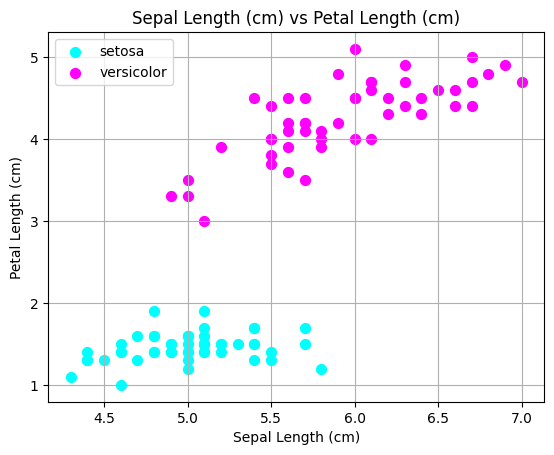

In [502]:
setosa_data,versicolor_data = [data_df[data_df['target'] == target] for target in (0,1)]

def graf(s_data,v_data):
    plt.figure()
    plt.scatter(s_data['sepal length (cm)'], s_data['petal length (cm)'], label="setosa", color='cyan', s=50)
    plt.scatter(v_data['sepal length (cm)'],v_data['petal length (cm)'], label="versicolor", color='magenta', s=50)

    plt.title('Sepal Length (cm) vs Petal Length (cm)')
    plt.xlabel('Sepal Length (cm)')
    plt.ylabel('Petal Length (cm)')
    plt.grid()
    plt.legend()
    
graf(setosa_data,versicolor_data)


### **Entrenamiento y prueba**

In [503]:
X = data_df[['sepal length (cm)','petal length (cm)']].values
y = data_df['target'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

Inicializar nuestro **Perceptron**

In [504]:
# Ajustar parametros
Perceptron.learning_rate = 0.9
Perceptron.epochs = 100

w_iris, b_iris = Perceptron.train(X_train,y_train)
print(f"Pesos ajustados: {w_iris}")
print(f"Bias ajustado: {b_iris}")

Epoch 0
Input: [4.8 1.4], Label: 0 Error: -1
Input: [6.3 4.9], Label: 1 Error: 1
Input: [5.4 4.5], Label: 1 Error: 0
Input: [5.5 3.7], Label: 1 Error: 0
Input: [6.4 4.3], Label: 1 Error: 0
Input: [5.6 4.1], Label: 1 Error: 0
Input: [4.9 1.5], Label: 0 Error: -1
Input: [6.  5.1], Label: 1 Error: 1
Input: [6.7 4.7], Label: 1 Error: 0
Input: [5.9 4.8], Label: 1 Error: 0
Input: [5.7 3.5], Label: 1 Error: 0
Input: [5.1 1.5], Label: 0 Error: -1
Input: [4.9 1.4], Label: 0 Error: 0
Input: [5.1 1.6], Label: 0 Error: 0
Input: [6. 4.], Label: 1 Error: 0
Input: [5.7 4.2], Label: 1 Error: 0
Input: [5.8 1.2], Label: 0 Error: 0
Input: [5.6 3.6], Label: 1 Error: 0
Input: [5.5 3.8], Label: 1 Error: 0
Input: [6.1 4.6], Label: 1 Error: 0
Input: [5.4 1.7], Label: 0 Error: 0
Input: [4.8 1.4], Label: 0 Error: 0
Input: [5.1 1.5], Label: 0 Error: 0
Input: [6.  4.5], Label: 1 Error: 0
Input: [5.4 1.7], Label: 0 Error: 0
Input: [5.4 1.3], Label: 0 Error: 0
Input: [5.5 1.4], Label: 0 Error: 0
Input: [5.2 3.9], L

##### **Predicciones**

In [ ]:
y_pred = Perceptron.predict(X_test,w_iris,b_iris)
print(f'Predicción: {y_pred}')
print(f'Prueba    : {y_test}') 

Predicción: [0 1 0 1 0 0 0 1 1 1 1 0 1 1 1 1 1 0 0 1]
Prueba    : [0 1 0 1 0 0 0 1 1 1 1 0 1 1 1 1 1 0 0 1]


In [506]:
print(Perceptron.predict(np.array([4.9,1.4]).reshape(1, -1), w_iris,b_iris)) # Indice 1 del DataFrame

[0]


In [507]:
accuracy = Perceptron.accuracy_score(y_pred,y_test)
print(f"Exactitud del perceptron: {accuracy}")

Exactitud del perceptron: 1.0


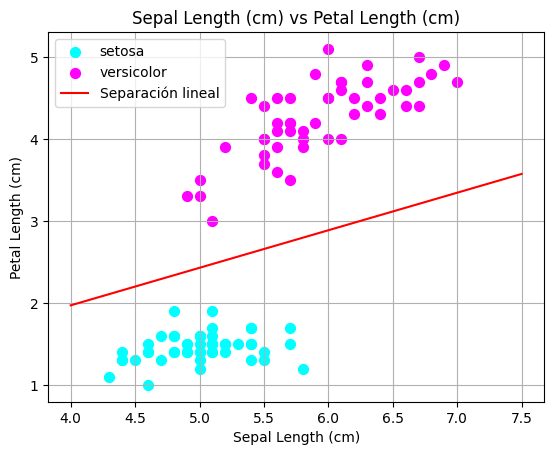

In [508]:
graf(setosa_data,versicolor_data)
x_values = np.linspace(4,7.5,100) # (Inicio, fin, número de puntos)
y_values = (-w_iris[0] / w_iris[1]) * x_values - b_iris / w_iris[1]
plt.plot(x_values, y_values, 'r', label='Separación lineal')
plt.legend()
plt.show()